In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df = pd.read_csv(r"/content/drive/Shareddrives/[FYP] Fake News Detection/Lexicon based study/political_fact_checker.csv")

df.info()

In [ ]:
df_fake = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/ISOT/Fake.csv")
df_true = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/ISOT/True.csv")

df_fake["statement"]=df_fake["text"]
df_true["statement"]=df_true["text"]
df_true["label"]=0
df_fake["label"]=1
df_true["target"]=df_true["label"]
df_fake["target"]=df_fake["label"]

df=df_true.append(df_fake,ignore_index = True)
df.drop(["subject","date"],axis=1 , inplace=True)
df = df.sample(frac=1).reset_index(drop=True)

print(df_true.info())
print(df_fake.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      21417 non-null  object
 1   text       21417 non-null  object
 2   subject    21417 non-null  object
 3   date       21417 non-null  object
 4   statement  21417 non-null  object
 5   label      21417 non-null  int64 
 6   target     21417 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      23481 non-null  object
 1   text       23481 non-null  object
 2   subject    23481 non-null  object
 3   date       23481 non-null  object
 4   statement  23481 non-null  object
 5   label      23481 non-null  int64 
 6   target     23481 non-null  int64 
dtypes: int64(2), object(5)

In [ ]:
# df_fake = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/FakeNewsNet/gossipcop_fake.csv")
# df_true = pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/FakeNewsNet/gossipcop_real.csv")
# df_fake["statement"]=df_fake["title"]
# df_true["statement"]=df_true["title"]
# df_true["label"]=0
# df_fake["label"]=1
# df_true["target"]=df_true["label"]
# df_fake["target"]=df_fake["label"]
# df=df_true.append(df_fake,ignore_index = True)
# # df.drop(["subject","date"],axis=1 , inplace=True)
# df = df.sample(frac=1).reset_index(drop=True)
# print(df_true.info())
# print(df_fake.info())

In [ ]:
# df=pd.read_csv("/content/drive/Shareddrives/FYP - knk/Datasets/WELFake/sementic+sentiment_welfake.csv")
# df.info()

In [ ]:
df.head()

,title,text,statement,label,target
0,Britain's U.S. ambassador discussed Trump retw...,LONDON (Reuters) - Britain’s ambassador to the...,LONDON (Reuters) - Britain’s ambassador to the...,0,0
1,DID OBAMA COMMIT A FELONY When He Sent $400 Mi...,Fox News Senior Judicial Analyst Judge Andrew ...,Fox News Senior Judicial Analyst Judge Andrew ...,1,1
2,ARROGANT Former ILLEGAL ALIEN Brags About Usin...,"Julissa Arce, who is now a Vice President at G...","Julissa Arce, who is now a Vice President at G...",1,1
3,Detroit’s Black Voters Show Trump They Aren’t...,Republican presidential nominee Donald Trump k...,Republican presidential nominee Donald Trump k...,1,1
4,PRESIDENT TRUMP: “Terrible. Just Found Out Tha...,President Trump on Saturday claimed President ...,President Trump on Saturday claimed President ...,1,1


In [ ]:
# df["statement"]=df["text"]
# df["target"]=df["label"]

In [ ]:
df = df.dropna(subset = ['statement'], how='all')

In [ ]:
# Remove Duplicates

duplicate_count = len(df['statement'])-len(df['statement'].drop_duplicates())
print('Duplicate count:', duplicate_count)
print('Total records before remove duplicates:', df.shape[0])

# drop duplicates (keep the last post of each of the duplicates)

df = df.drop_duplicates(subset='statement', keep="first")
print('updated record count:', df.shape[0])

Duplicate count: 6252
Total records before remove duplicates: 44898
updated record count: 38646


In [ ]:
import string
import re

def lower(text):
  return text.lower()

# remove urls
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_nonascii(sent):
  return "".join([i for i in sent if i.isascii()])

def remove_punctuations(text):
  # text = text.translate(str.maketrans('', ' ', string.punctuation))
  # return text

  res = re.sub(r'[^\w\s]', ' ', text)
  return res

def remove_num(text):
  return "".join([c for c in text if not c.isdigit()])

# remove multiple spaces
def remove_mul_space(text):
  return " ".join(text.split())

def clean(text):
  text = lower(text)
  text = remove_urls(text)
  text = remove_nonascii(text)
  text = remove_punctuations(text)
  text = remove_num(text)
  text = remove_mul_space(text)
  return text

In [ ]:
df['text'] = df['statement'].apply(clean)

In [ ]:
df.tail()

,title,text,statement,label,target
44892,Shots fired by U.S. military personnel to stop...,mildenhall england reuters u s military person...,"MILDENHALL, England (Reuters) - U.S. military ...",0,0
44893,Trump says he believes block-grant healthcare ...,washington reuters u s president donald trump ...,WASHINGTON (Reuters) - U.S. President Donald T...,0,0
44894,Minsk cultural hub becomes haven from authorities,minsk reuters in the shadow of disused soviet ...,MINSK (Reuters) - In the shadow of disused Sov...,0,0
44896,France says takes U.S. claims Iran violated U....,paris reuters france s foreign ministry said o...,PARIS (Reuters) - France s foreign ministry sa...,0,0
44897,Trump Busted For Plagiarizing His Orlando Mas...,by nearly all accounts donald trump s response...,"By nearly all accounts, Donald Trump s respons...",1,1


In [ ]:
# Next we remove stop words.
# We use the SMART stop word list here
# Initially we import the text file and create the list.

stop = []
with open("/content/drive/Shareddrives/FYP - knk/Resources/SMART_STOP_WORDS.txt", "r") as f:
  for word in f:
      # Here we remove the apostrophe as well
      stop.append((word.strip()).replace("'",""))

# Remove the words in 'stop' list
def remove_stop_words(content):
  tokens = content.split()
  stop_removed_tokens = [t for t in tokens if t not in stop]
  convert_to_string = " ".join(stop_removed_tokens)
  return convert_to_string

In [ ]:
df['text'] = df['text'].apply(remove_stop_words)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def nltk2wn_tag(nltk_tag):
  if nltk_tag.startswith('J'):
    return wordnet.ADJ
  elif nltk_tag.startswith('V'):
    return wordnet.VERB
  elif nltk_tag.startswith('N'):
    return wordnet.NOUN
  elif nltk_tag.startswith('R'):
    return wordnet.ADV
  else:                    
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))    
  wn_tagged = map(lambda x: (x[0], nltk2wn_tag(x[1])), nltk_tagged)
  res_words = []
  for word, tag in wn_tagged:
    if tag is None:                        
      res_words.append(word)
    else:
      res_words.append(lemmatizer.lemmatize(word, tag))
  return " ".join(res_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from tqdm.auto import tqdm
tqdm.pandas()

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [ ]:
df['text'] = df['text'].progress_apply(lemmatize_sentence)

In [ ]:
df['target'].unique()

array([0, 1])

In [ ]:
df=df.loc[df['target'].isin(['false','barely-true','pants-fire','true','mostly-true','half-true'])]
df["target"].replace({"false":1,'barely-true':1,'pants-fire':1,'mostly-true':0,'half-true':0,"true":0}, inplace=True)
df["target"] = pd.to_numeric(df["target"])

In [ ]:
# df_fake = df.loc[df['target'].isin(['false','barely-true','pants-fire'])]

# df_true = df.loc[df['target'].isin(['true','mostly-true','half-true'])]
df_fake = df.loc[df['target']==1]

df_true = df.loc[df['target']==0]

In [ ]:
# df_fake["target"].replace({"false":1,'barely-true':1,'pants-fire':1}, inplace=True)
# df_true["target"].replace({'mostly-true':0,'half-true':0,"true":0}, inplace=True)
# 
# # dff=dff.loc[(dff['target']==1) | (dff['target']==0)]
# # dff["target"] = pd.to_numeric(dff["target"])
# # dff["target"].unique()

array([], dtype=int64)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38646 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      38646 non-null  object
 1   text       38646 non-null  object
 2   statement  38646 non-null  object
 3   label      38646 non-null  int64 
 4   target     38646 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ MB


In [ ]:
# print(df_fake.info())
# print(df_true.info())

In [ ]:
df_fake_train, df_fake_test = train_test_split(df_fake, test_size=0.2, random_state=142)
df_true_train, df_true_test = train_test_split(df_true, test_size=0.2, random_state=142)


# df_fake_train = df_fake[:fake_length]
# df_fake_test = df_fake[fake_length:]

# df_true_train = df_true[:true_length]
# df_true_test = df_true[true_length:]

In [ ]:
df_fake_train

In [ ]:
from collections import Counter

counts_common = {}
counts_true_unique={}
counts_fake_unique={}

fake = ' '.join(df_fake_train['text'].tolist())
fake = fake.split()

counts_fake = dict(Counter(fake))

true = ' '.join(df_true_train['text'].tolist())
true = true.split()

counts_true = dict(Counter(true))


# getting common lexicon count
for key in counts_true.keys():
  if key in counts_fake.keys():
    counts_common[key] = counts_true[key]+counts_fake[key]

# getting unique lexicon in True 
for key in counts_true.keys():
  if key not in counts_fake.keys():
    counts_true_unique[key] = counts_true[key]

# getting unique lexicon in Fake
for key in counts_fake.keys():
  if key not in counts_true.keys():
    counts_fake_unique[key] = counts_fake[key]

In [ ]:
true_freq, fake_freq = 0, 0
true_unique_frq,fake_unique_frq=0,0

# Getting total lexicon frequency 
for key in counts_true.keys():
  true_freq += counts_true[key]

for key in counts_fake.keys():
  fake_freq += counts_fake[key]

for key in counts_true_unique.keys():
  true_unique_frq += counts_true_unique[key]

for key in counts_fake_unique.keys():
  fake_unique_frq += counts_fake_unique[key]


for key in counts_true.keys():
  counts_true[key] = counts_true[key]/float(true_freq)

for key in counts_fake.keys():
  counts_fake[key] = counts_fake[key]/float(fake_freq)

for key in counts_common.keys():
  counts_common[key] = counts_common[key]/float(true_freq+fake_freq)

for key in counts_true_unique.keys():
  counts_true_unique[key] = counts_true_unique[key]/float(true_unique_frq)

for key in counts_fake_unique.keys():
  counts_fake_unique[key] = counts_fake_unique[key]/float(fake_unique_frq)

In [ ]:
import pickle

lexicon = {
    'fake' : counts_fake,
    'true' : counts_true,
    'common': counts_common,
    'unique_true':counts_true_unique,
    'unique_fake':counts_fake_unique
    
}

# with open('/content/drive/Shareddrives/[FYP] Fake News Detection/Lexicon based study/ISOT_Lexicon.pickle', 'wb') as handle:
#     pickle.dump(lexicon, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('/content/drive/Shareddrives/[FYP] Fake News Detection/Lexicon based study/WELFake_Lexicon1.pickle', 'rb') as handle:
#     b = pickle.load(handle)

# print(lexicon == b)

In [ ]:
# counts_fake=b["fake"]
# counts_true=b["true"]
# counts_common=b["common"]
# counts_true_unique=b["unique_true"]
# counts_fake_unique=b["unique_fake"]

In [ ]:
# test_fake = df_fake_test['text'].tolist()

# fake_count = 0

# for item in test_fake:
#   fake_score, true_score = 0, 0
#   for word in item.split():
#     if word in counts_true.keys():
#       true_score += counts_true[word]
#     if word in counts_fake.keys():
#       fake_score += counts_fake[word]
#   if fake_score > true_score: 
#     fake_count += 1    

In [ ]:
# print(fake_count)
# print(len(test_fake))

In [ ]:
# test_true = df_true_test['text'].tolist()

# true_count = 0

# for item in test_true:
#   fake_score, true_score = 0, 0
#   for word in item.split():
#     if word in counts_true.keys():
#       true_score += counts_true[word]
#     if word in counts_fake.keys():
#       fake_score += counts_fake[word]
#   if fake_score < true_score: 
#     true_count += 1  

In [ ]:
# print(true_count)
# print(len(test_true))

In [ ]:
# accuracy = (true_count+fake_count)/float(len(test_true)+len(test_fake)) * 100
# print(accuracy)

In [ ]:
def generate_fake_score(text):
  fake_score, true_score , common_score ,unique_true_score,unique_fake_score = 0, 0 ,0 ,0 ,0
  for word in text.split():
    if word in counts_true.keys():
      true_score += counts_true[word]
    if word in counts_common.keys():
      common_score += counts_common[word]
    if word in counts_fake.keys():
      fake_score += counts_fake[word]
    if word in counts_true_unique.keys():
      unique_true_score+=counts_true_unique[word]
    if word in counts_fake_unique.keys():
      unique_fake_score+=counts_fake_unique[word]
  return pd.Series([fake_score, true_score , common_score ,unique_true_score,unique_fake_score], index=['fake_score', 'true_score', 'common_score',"unique_true_score","unique_fake_score"])

In [ ]:
# generate_fake_score("Haiti, Tanzania and Madagascar refused the ")

fake_score           0.000013
true_score           0.000007
common_score         0.000002
unique_true_score    0.000000
unique_fake_score    0.000000
dtype: float64

In [ ]:
dff=df_fake_train["text"].apply(generate_fake_score)
df_fake_train=pd.concat([df_fake_train,dff],axis=1)

dff=df_fake_test["text"].apply(generate_fake_score)
df_fake_test=pd.concat([df_fake_test,dff],axis=1)

dff=df_true_train["text"].apply(generate_fake_score)
df_true_train=pd.concat([df_true_train,dff],axis=1)

dff=df_true_test["text"].apply(generate_fake_score)
df_true_test=pd.concat([df_true_test,dff],axis=1)

In [ ]:
# df_fake_train

In [ ]:
# dff=df["text"].apply(generate_fake_score)

In [ ]:
# dff=pd.concat([df,dff],axis=1)

In [ ]:
df_train=df_fake_train.append(df_true_train,ignore_index=True).sample(frac=1).reset_index(drop=True)
df_test=df_fake_test.append(df_true_test,ignore_index=True).sample(frac=1).reset_index(drop=True)


# X_train=df_train[['fake_score', 'true_score', 'common_score',"unique_true_score","unique_fake_score"]]
# X_val=df_test[['fake_score', 'true_score', 'common_score',"unique_true_score","unique_fake_score"]]

X_train=df_train[['common_score',"unique_true_score","unique_fake_score"]]
X_val=df_test[[ 'common_score',"unique_true_score","unique_fake_score"]]

y_train=df_train.target
y_val=df_test.target

In [ ]:
# dff["target"].replace({"false":1,'barely-true':1,'pants-fire':1,'mostly-true':0,'half-true':0,"true":0}, inplace=True)
# dff=dff.loc[(dff['target']==1) | (dff['target']==0)]
# dff["target"] = pd.to_numeric(dff["target"])
# dff["target"].unique()


In [ ]:
# X=dff[['fake_score', 'true_score', 'common_score']]

In [ ]:
# Y=dff.target

In [ ]:
# X_train.head()

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=142,stratify=Y)

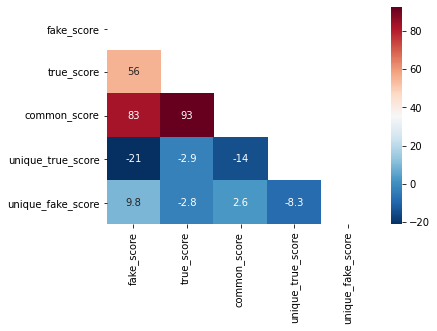

In [ ]:
# mask out upper triangle
import numpy as np
import seaborn as sns
mask = np.zeros_like(df_train[['fake_score', 'true_score', 'common_score',"unique_true_score","unique_fake_score"]].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# plt.figure(figsize=(20,20))
sns.heatmap(df_train[['fake_score', 'true_score', 'common_score',"unique_true_score","unique_fake_score"]].corr()*100, 
           cmap='RdBu_r', 
           annot = True, 
           mask = mask
            )

In [ ]:
corr = df_train[['fake_score', 'true_score', 'common_score',"unique_true_score","unique_fake_score"]].corr()
corr.style.background_gradient(cmap='coolwarm')

,fake_score,true_score,common_score,unique_true_score,unique_fake_score
fake_score,1.000000,0.941016,0.982080,-0.008260,0.020960
true_score,0.941016,1.000000,0.987920,0.052256,0.005728
common_score,0.982080,0.987920,1.000000,0.024191,0.011778
unique_true_score,-0.008260,0.052256,0.024191,1.000000,-0.006679
unique_fake_score,0.020960,0.005728,0.011778,-0.006679,1.000000


In [ ]:
import torch
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, precision_recall_fscore_support, \
    confusion_matrix
from sklearn.svm import SVC
import re
import matplotlib.pyplot as plt

In [ ]:
def compute_metrics(pred,ground_labels):
    labels_all = ground_labels
    preds_all = list(pred)
    
    precision, recall, f1, _ = precision_recall_fscore_support(labels_all, preds_all)
    acc = accuracy_score(labels_all, preds_all)
    confusion_mat = confusion_matrix(labels_all, preds_all)
    # tn, fp, fn, tp = confusiton_mat.ravel()
    out_dict = {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall,
        'confusiton_mat': confusion_mat
    }
    return out_dict

# XG BOOST

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=120,algorithm="SAMME.R", learning_rate=0.0001)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
from sklearn import metrics
predicted_y = ada_clf.predict(X_val)
gg=compute_metrics(predicted_y,y_val)
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-f','prec-t', 'rec-f','rec-t','f1-f','f1-t','accu','tn', 'fp', 'fn', 'tp'))
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
0.845	0.728	0.733	0.842	0.785	0.781	0.783	4306	1571	791	4204


In [ ]:
# Welfake validated on Politifact
# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.548	0.546	0.144	0.897	0.228	0.679	0.547	1299	7738	1071	

# Welfake validated on Gossicop
# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.740	0.233	0.010	0.988	0.020	0.377	0.238	162	15745	57	4779

# Welfake validated on ISOT
# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.827	0.863	0.899	0.771	0.862	0.815	0.842	19056	2135	3990	13465

# compare different models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['Gaussian Naive Bayes :',GaussianNB()]]
cla_pred=[]

In [ ]:
# ~ 4-5 min run 
for name,model1 in classifiers:
    print("-----------"+name+"-------------")
    model1.fit(X_train,y_train)
    predicted_y = model1.predict(X_val)
    score=compute_metrics(predicted_y,y_val)
    cla_pred.append(score)

-----------Logistic Regression :-------------
-----------Decision Tree Classification :-------------
-----------Gradient Boosting Classification :-------------
-----------Ada Boosting Classification :-------------
-----------Extra Tree Classification :-------------
-----------K-Neighbors Classification :-------------
-----------Support Vector Classification :-------------
-----------Gaussian Naive Bayes :-------------


In [ ]:
#Prining the evaluation matrix to the console
# print("Summary\n Class 0- True news \n Class 1 - False news\n")
# for i in range(len(classifiers)):
#   print("-----------"+classifiers[i][0]+"-------------")
#   d=cla_pred[i]
#   print ("{:}\t{:}\t{:}\t{:}".format('label','precision','recall',"f1-score"))
#   print ("{:}\t{:.3f}\t\t{:.3f}\t{:.3f}".format("0", d['precision'][0], d['recall'][0],d['f1'][0]))
#   print ("{:}\t{:.3f}\t\t{:.3f}\t{:.3f}".format("1", d['precision'][1], d['recall'][1],d['f1'][1]))
#   print("\n")
#   print ("{:<5} {:<15}".format("accuracy", d['accuracy']))
#   print("\n")
#   print("confusiton_mat")
#   tn, fp, fn, tp = cla_pred[i]["confusiton_mat"].ravel()
#   print ("{:<25} {:<10} {:<10}".format("Actual \Prediction", "0","1"))
#   print ("{:<25} {:<10} {:<10}".format("0", tn,fp))
#   print ("{:<25} {:<10} {:<10}".format("1", fn,tp))
#   print("\n")

In [ ]:
#Prining the evaluation matrix to the console
print("Summary\n Class 0- True news \n Class 1 - False news\n")
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-f','prec-t', 'rec-f','rec-t','f1-f','f1-t','accu','tn', 'fp', 'fn', 'tp'))
for i in range(len(classifiers)):
  # print("-----------"+classifiers[i][0]+"-------------")
  d=cla_pred[i]
  tn, fp, fn, tp = cla_pred[i]["confusiton_mat"].ravel()
  print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

Summary
 Class 0- True news 
 Class 1 - False news

prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
0.554	0.949	0.999	0.021	0.712	0.042	0.558	4235	4	3416	75
0.885	0.716	0.711	0.888	0.788	0.793	0.791	3012	1227	390	3101
0.861	0.742	0.757	0.852	0.805	0.793	0.800	3207	1032	517	2974
0.819	0.787	0.826	0.778	0.822	0.782	0.804	3503	736	776	2715
0.877	0.875	0.900	0.847	0.889	0.861	0.876	3815	424	533	2958
0.816	0.842	0.883	0.759	0.848	0.798	0.827	3741	498	842	2649
0.684	0.654	0.747	0.581	0.714	0.615	0.672	3166	1073	1464	2027
0.845	0.918	0.942	0.789	0.891	0.849	0.873	3994	245	735	2756


In [ ]:
# --------Logistic Regression :-------------
# -----------Decision Tree Classification :-------------
# -----------Gradient Boosting Classification :-------------
# -----------Ada Boosting Classification :-------------
# -----------Extra Tree Classification :-------------
# -----------K-Neighbors Classification :-------------
# -----------Support Vector Classification :-------------
# -----------Gaussian Naive Bayes :-----------

In [ ]:
# Welfake validated on Politifact
#  Class 0- True news 
#  Class 1 - False news

# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.692	0.535	0.001	1.000	0.002	0.697	0.535	9	9028	4	10385
# 0.568	0.548	0.142	0.906	0.227	0.683	0.551	1280	7757	972	9417
# 0.607	0.542	0.061	0.966	0.111	0.694	0.545	550	8487	356	10033
# 0.631	0.538	0.029	0.985	0.055	0.696	0.540	262	8775	153	10236
# 0.586	0.545	0.095	0.941	0.164	0.690	0.548	859	8178	608	9781
# 0.595	0.544	0.084	0.950	0.148	0.692	0.547	762	8275	519	9870
# 0.655	0.539	0.028	0.987	0.054	0.697	0.541	254	8783	134	10255
# 0.465	0.587	0.996	0.005	0.634	0.010	0.466	8999	38	10335	54

# Welfake validated on Gossicop
#  Class 0- True news 
#  Class 1 - False news

# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.000	0.233	0.000	1.000	0.000	0.378	0.233	0	15907	0	4836
# 0.758	0.233	0.024	0.975	0.047	0.376	0.246	385	15522	123	4713
# 1.000	0.233	0.000	1.000	0.000	0.378	0.233	1	15906	0	4836
# 1.000	0.233	0.000	1.000	0.000	0.378	0.233	1	15906	0	4836
# 0.791	0.233	0.004	0.996	0.009	0.378	0.236	68	15839	18	4818
# 0.800	0.233	0.000	1.000	0.001	0.378	0.233	4	15903	1	4835
# 0.000	0.233	0.000	1.000	0.000	0.378	0.233	0	15907	0	4836
# 0.767	0.333	1.000	0.000	0.868	0.000	0.767	15905	2	4835	1

# Welfake validated on ISOT

#  Class 0- True news 
#  Class 1 - False news

# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.835	0.831	0.867	0.791	0.851	0.811	0.833	18377	2814	3640	13815
# 0.981	0.998	0.999	0.977	0.990	0.987	0.989	21164	27	407	17048
# 0.852	0.893	0.920	0.806	0.885	0.847	0.869	19500	1691	3381	14074
# 0.832	0.891	0.922	0.774	0.875	0.828	0.855	19537	1654	3942	13513
# 0.981	0.999	0.999	0.976	0.990	0.988	0.989	21174	17	414	17041
# 0.871	0.911	0.933	0.832	0.901	0.870	0.887	19769	1422	2929	14526
# 0.849	0.895	0.922	0.800	0.884	0.845	0.867	19547	1644	3488	13967
# 0.586	0.475	0.402	0.656	0.477	0.551	0.517	8510	12681	6001	11454

# SVG classifier

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
start = time.time()

svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train,y_train)

end = time.time()
process = round(end-start,2)
print("Support Vector Machine Classifier has fitted, this process took {} seconds".format(process))

# print(svm_classifier.score(X_val,y_val))

Support Vector Machine Classifier has fitted, this process took 350.72 seconds


In [ ]:
predicted_y = svm_classifier.predict(X_val)
print(predicted_y)

[1 0 0 ... 0 1 0]


In [ ]:
gg=compute_metrics(predicted_y,y_val)

In [ ]:
gg

{'accuracy': 0.8672048853697666, 'confusiton_mat': array([[19547,  1644],
        [ 3488, 13967]]), 'f1': array([0.88395966, 0.84479526]), 'precision': array([0.84857825, 0.89468964]), 'recall': array([0.9224199 , 0.80017187])}

In [ ]:
d=gg
tn, fp, fn, tp = d["confusiton_mat"].ravel()
print("{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}\t{:}".format('prec-f','prec-t', 'rec-f','rec-t','f1-f','f1-t','accu','tn', 'fp', 'fn', 'tp'))
print ("{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:}\t{:}\t{:}\t{:}".format(d['precision'][0],d['precision'][1], d['recall'][0],d['recall'][1],d['f1'][0],d['f1'][1],d['accuracy'],tn, fp, fn, tp))

prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
0.849	0.895	0.922	0.800	0.884	0.845	0.867	19547	1644	3488	13967


In [ ]:
# Welfake validated on Politifact
# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.655	0.539	0.028	0.987	0.054	0.697	0.541	254	8783	134	10255



# RESULTS

In [ ]:
# --------Logistic Regression :-------------
# -----------Decision Tree Classification :-------------
# -----------Gradient Boosting Classification :-------------
# -----------Ada Boosting Classification :-------------
# -----------Extra Tree Classification :-------------
# -----------K-Neighbors Classification :-------------
# -----------Support Vector Classification :-------------
# -----------Gaussian Naive Bayes :-----------

In [ ]:
# Politifact (0.2 ratio)
# Summary
#  Class 0- True news 
#  Class 1 - False news

# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.590	0.562	0.226	0.864	0.327	0.681	0.567	408	1400	283	1795
# 0.518	0.581	0.520	0.578	0.519	0.579	0.551	941	867	877	1201
# 0.607	0.654	0.595	0.665	0.601	0.659	0.632	1076	732	697	1381
# 0.609	0.646	0.570	0.681	0.589	0.663	0.630	1031	777	662	1416
# 0.561	0.624	0.584	0.603	0.572	0.613	0.594	1055	753	826	1252
# 0.545	0.605	0.546	0.604	0.546	0.604	0.577	987	821	823	1255
# 0.610	0.656	0.597	0.668	0.603	0.662	0.635	1079	729	689	1389
# 0.558	0.567	0.311	0.785	0.400	0.659	0.565	563	1245	446	1632

In [ ]:
# WelFake
# Summary
#  Class 0- True news 
#  Class 1 - False news

# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.806	0.760	0.792	0.775	0.799	0.768	0.785	4657	1220	1122	3873
# 0.760	0.728	0.774	0.712	0.767	0.720	0.745	4546	1331	1438	3557
# 0.810	0.791	0.827	0.771	0.818	0.781	0.802	4862	1015	1142	3853
# 0.786	0.792	0.836	0.733	0.811	0.761	0.789	4914	963	1334	3661
# 0.786	0.770	0.813	0.739	0.799	0.754	0.779	4776	1101	1304	3691
# 0.793	0.774	0.814	0.750	0.803	0.762	0.784	4785	1092	1251	3744
# 0.810	0.797	0.833	0.771	0.822	0.784	0.805	4897	980	1145	3850
# 0.573	0.477	0.375	0.671	0.454	0.558	0.511	2206	3671	1644	3351

In [ ]:
# ISOT
# Summary
#  Class 0- True news 
#  Class 1 - False news

# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.867	0.869	0.897	0.833	0.882	0.851	0.868	3802	437	583	2908
# 0.856	0.825	0.856	0.825	0.856	0.825	0.842	3628	611	612	2879
# 0.881	0.881	0.905	0.851	0.893	0.866	0.881	3838	401	520	2971
# 0.869	0.879	0.906	0.835	0.887	0.856	0.874	3839	400	577	2914
# 0.870	0.873	0.900	0.837	0.885	0.855	0.871	3813	426	569	2922
# 0.869	0.870	0.897	0.836	0.883	0.853	0.869	3804	435	574	2917
# 0.884	0.884	0.907	0.855	0.895	0.869	0.884	3846	393	506	2985
# 0.611	0.690	0.882	0.318	0.722	0.436	0.627	3739	500	2380	1111

In [ ]:
# GossipCop
# Summary
#  Class 0- True news 
#  Class 1 - False news

# prec-f	prec-t	rec-f	rec-t	f1-f	f1-t	accu	tn	fp	fn	tp
# 0.769	0.933	1.000	0.014	0.870	0.029	0.770	3181	1	953	14
# 0.834	0.453	0.834	0.452	0.834	0.453	0.745	2655	527	530	437
# 0.841	0.662	0.935	0.417	0.885	0.511	0.814	2976	206	564	403
# 0.832	0.689	0.949	0.369	0.887	0.481	0.814	3021	161	610	357
# 0.841	0.523	0.873	0.456	0.857	0.487	0.776	2779	403	526	441
# 0.842	0.578	0.902	0.443	0.871	0.501	0.795	2869	313	539	428
# 0.829	0.712	0.957	0.350	0.888	0.469	0.815	3045	137	629	338
# 0.827	0.560	0.911	0.371	0.867	0.447	0.785	2900	282	608	359

# getting top features


Optimal number of features : 5


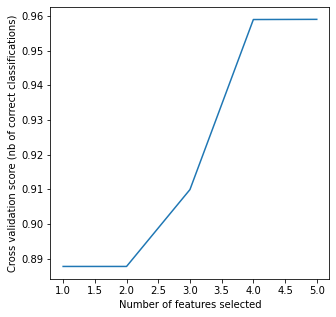

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
# from sklearn.datasets import make_classification
# from sklearn import discriminant_analysis

clf=RandomForestClassifier(n_estimators=100,max_features='auto',random_state=0,max_depth=14,class_weight='balanced')
rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(),scoring='f1')
rfecv.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

plt.figure(figsize=(5,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [ ]:
rfecv.grid_scores_

array([0.88771575, 0.88771575, 0.90989354, 0.95895325, 0.95900585])

In [ ]:
rfecv.support_

array([ True,  True,  True,  True,  True])

In [ ]:
rfecv.ranking_

array([1, 1, 1, 1, 1])

In [ ]:
X_train.columns.values[rfecv.support_]

array(['fake_score', 'true_score', 'common_score', 'unique_true_score',
       'unique_fake_score'], dtype=object)

In [ ]:
X_train

,fake_score,true_score,common_score,unique_true_score,unique_fake_score
0,0.329213,0.308240,0.079266,0.000000,0.000000
1,0.302716,0.234292,0.065771,0.000018,0.000000
2,0.012065,0.008967,0.002567,0.000000,0.000110
3,0.085349,0.072384,0.019460,0.000000,0.000000
4,0.114695,0.102648,0.026929,0.000000,0.000000
...,...,...,...,...,...
43479,0.140082,0.111101,0.030824,0.000000,0.000000
43480,0.461465,0.360326,0.100721,0.000142,0.000000
43481,0.084889,0.064392,0.018254,0.000000,0.000197
43482,0.205043,0.183155,0.048091,0.000000,0.000208
